In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mvlearn.datasets import make_gaussian_mixture
from mvlearn.semi_supervised import CTClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [22]:
# generating the data
n_samples = 100
centers = [[-1,0], [1,0]]
covariances = [np.eye(2), np.eye(2)]
Xs, y = make_gaussian_mixture(n_samples, centers, covariances, random_state=5, 
                              noise=0.01, shuffle=True, shuffle_random_state=42)


Text(0.5, 1.0, ' View 2')

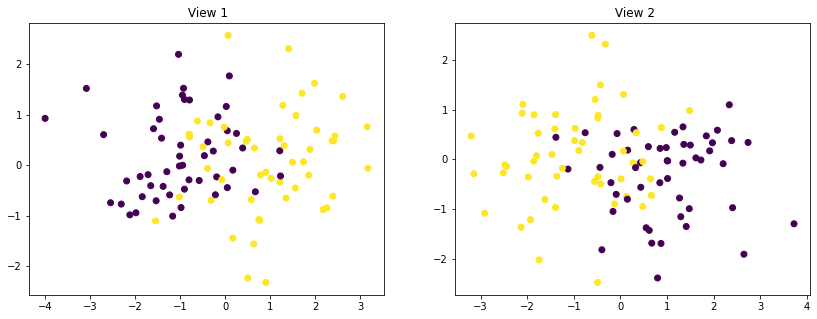

In [23]:
# visualizing generated data 
view_1 = Xs[0]
view_2 = Xs[1]
labels = y

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].scatter(view_1[:, 0], view_1[:, 1], c=labels)
ax[0].set_title(' View 1')


ax[1].scatter(view_2[:, 0], view_2[:, 1], c=labels)
ax[1].set_title(' View 2')

In [24]:
# train test split of data fram each view seperately
X1_train, X1_test, l1_train, l1_test = train_test_split(view_1, labels, random_state=42, test_size=0.3)
X2_train, X2_test, l2_train, l2_test = train_test_split(view_2, labels, random_state=42, test_size=0.3)

In [25]:
# defining the estimators
# case -1
clf1 = RandomForestClassifier()
clf2 = KNeighborsClassifier(n_neighbors = 3)

# case -2
clf3 = GaussianNB()
clf4 = LogisticRegression()

###### View -1 

In [26]:
# with case-1 estimators do co-training classification
ctc = CTClassifier(clf1, clf2, random_state=1)
ctc = ctc.fit([X1_train, X1_train], l1_train)
preds_train11 = ctc.predict([X1_train, X1_train])

# Calculating accuracy for train and test data
print("Train Accuracy: ", sum(preds_train11==l1_train) / len(preds_train11))
preds_test11 = ctc.predict([X1_test, X1_test])
print("Test Accuracy: ", sum(preds_test11==l1_test) / len(preds_test11))

Train Accuracy:  0.9428571428571428
Test Accuracy:  0.7


In [27]:
# with case-2 estimators do co-training classification
ctc = CTClassifier(clf3, clf4, random_state=1)
ctc = ctc.fit([X1_train, X1_train], l1_train)
preds_train12 = ctc.predict([X1_train, X1_train])

# Calculating accuracy for train and test data
print("Train Accuracy: ", sum(preds_train12==l1_train) / len(preds_train12))
preds_test12 = ctc.predict([X1_test, X1_test])
print("Test Accuracy: ", sum(preds_test12==l1_test) / len(preds_test12))

Train Accuracy:  0.7714285714285715
Test Accuracy:  0.8333333333333334


Text(0.5, 1.0, 'Predicted Clusters with Case-2 Estimators')

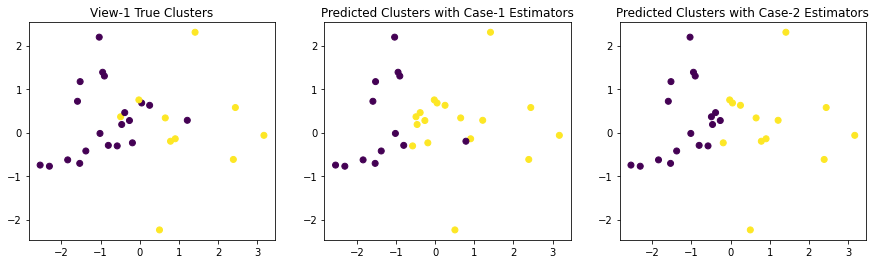

In [28]:
# visualising the predicted labels for test data

fig, ax = plt.subplots(1, 3, figsize=(15, 4))
ax[0].scatter(X1_test[:, 0], X1_test[:, 1], c=l1_test)
ax[0].set_title('View-1 True Clusters')

ax[1].scatter(X1_test[:, 0], X1_test[:, 1], c=preds_test11)
ax[1].set_title('Predicted Clusters with Case-1 Estimators')

ax[2].scatter(X1_test[:, 0], X1_test[:, 1], c=preds_test12)
ax[2].set_title('Predicted Clusters with Case-2 Estimators')


###### View -2

In [29]:
# with case-1 estimators do co-training classification
ctc = CTClassifier(clf1, clf2, random_state=1)
ctc = ctc.fit([X2_train, X2_train], l2_train)
preds_train21 = ctc.predict([X2_train, X2_train])

# Calculating accuracy for train and test data
print("Train Accuracy: ", sum(preds_train21==l2_train) / len(preds_train21))
preds_test21 = ctc.predict([X2_test, X2_test])
print("Test Accuracy: ", sum(preds_test21==l2_test) / len(preds_test21))

Train Accuracy:  0.9571428571428572
Test Accuracy:  0.7


In [30]:
# with case-2 estimators do co-training classification
ctc = CTClassifier(clf3, clf4, random_state=1)
ctc = ctc.fit([X2_train, X2_train], l2_train)
preds_train22 = ctc.predict([X2_train, X2_train])

# Calculating accuracy for train and test data
print("Train Accuracy: ", sum(preds_train22==l2_train) / len(preds_train22))
preds_test22 = ctc.predict([X2_test, X2_test])
print("Test Accuracy: ", sum(preds_test22==l2_test) / len(preds_test22))

Train Accuracy:  0.7857142857142857
Test Accuracy:  0.8333333333333334


Text(0.5, 1.0, 'Predicted Clusters with Case-2 Estimators')

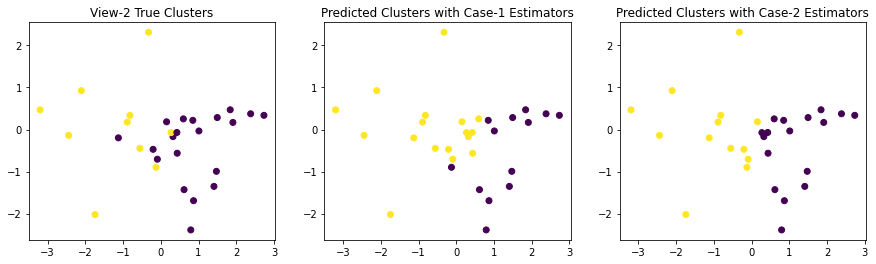

In [31]:
# visualising the predicted labels for test data

fig, ax = plt.subplots(1, 3, figsize=(15, 4))
ax[0].scatter(X2_test[:, 0], X2_test[:, 1], c=l2_test)
ax[0].set_title('View-2 True Clusters')

ax[1].scatter(X2_test[:, 0], X2_test[:, 1], c=preds_test21)
ax[1].set_title('Predicted Clusters with Case-1 Estimators')

ax[2].scatter(X2_test[:, 0], X2_test[:, 1], c=preds_test22)
ax[2].set_title('Predicted Clusters with Case-2 Estimators')

###### Observations

Case -1:

===================================

View -1:                                                         
             train accuracy = 0.94
             test accuracy  = 0.70

View -2:                                                         
             train accuracy = 0.96
             test accuracy  = 0.70   


===================================

Case -2:

===================================

View -1:                                                         
             train accuracy = 0.77
             test accuracy  = 0.83

View -2:                                                         
             train accuracy = 0.79
             test accuracy  = 0.83